<a href="https://colab.research.google.com/github/Tarfah98/T5-BOOTCAMP-nlp-unsupervised-project-/blob/main/nlp_unsupervised_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1-Imports

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.manifold import TSNE
import matplotlib.colors as mcolors
import gensim
from gensim.utils import simple_preprocess
from gensim.models import Phrases, phrases, ldamodel, CoherenceModel
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import spacy
import gensim.corpora as corpora
from pprint import pprint
from collections import Counter
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score,classification_report,log_loss
import sklearn.metrics as metrics
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import spacy


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pip install plotly

In [ ]:
# pip install pyLDAvis

In [ ]:
from google.colab import files
text = files.upload()

Saving train.csv to train (3).csv


In [ ]:
df=pd.read_csv("train.csv")

In [ ]:
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


### 2-Preprocessing

In [ ]:
df.shape

(19579, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19579 entries, 0 to 19578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      19579 non-null  object
 1   text    19579 non-null  object
 2   author  19579 non-null  object
dtypes: object(3)
memory usage: 459.0+ KB


In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import spacy

In [ ]:
n = {'EAP': 'Edgar Alan Poe', 'HPL':'HP Lovecraft', 'MWS':'Mary SHelley'}

data = [go.Bar(
            x = df.author.map(n).unique(),
            y = df.author.value_counts().values,
            marker = dict(colorscale = 'darkmint',
                         color = df.author.value_counts().values
                        ),
            text ='Texts per author'
    )]

layout = go.Layout(
    title = 'Distribution of target variable'
)

fig = go.Figure(data = data, layout = layout)
fig.show(renderer="colab")
py.iplot(fig, filename='basic-bar')

In [ ]:
#sns.countplot(df['author'])

In [ ]:
df['author'].value_counts()

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

In [ ]:
# eap = df[df.author=="EAP"]["text"].values
# hpl = df[df.author=="HPL"]["text"].values
# mws = df[df.author=="MWS"]["text"].values

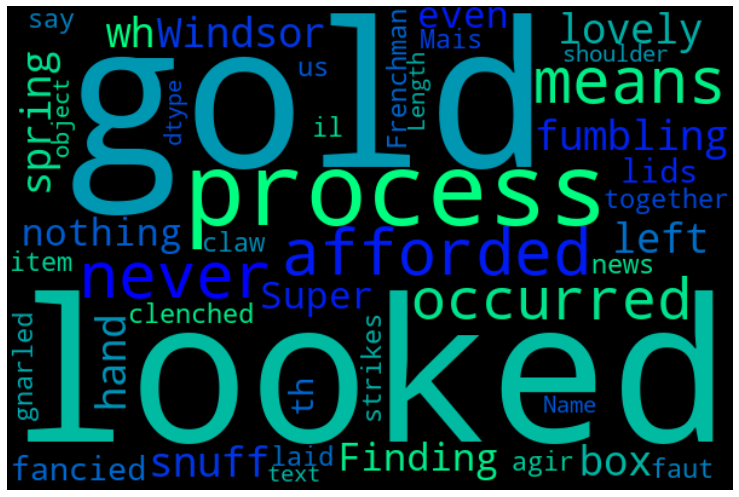

In [ ]:
cloud=WordCloud(colormap="winter",width=600,height=400).generate(str(df["text"]))
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear');

In [ ]:
df.drop(columns=['id'],axis=1,inplace=True)
df.head()

,text,author
0,"This process, however, afforded me no means of...",EAP
1,It never once occurred to me that the fumbling...,HPL
2,"In his left hand was a gold snuff box, from wh...",EAP
3,How lovely is spring As we looked from Windsor...,MWS
4,"Finding nothing else, not even gold, the Super...",HPL


In [ ]:
df['Raw Length']=df['text'].apply(lambda x: len(x.split()))
df.head()

,text,author,Raw Length
0,"This process, however, afforded me no means of...",EAP,41
1,It never once occurred to me that the fumbling...,HPL,14
2,"In his left hand was a gold snuff box, from wh...",EAP,36
3,How lovely is spring As we looked from Windsor...,MWS,34
4,"Finding nothing else, not even gold, the Super...",HPL,27


In [ ]:
df['text_processed'] = df['text'].map(lambda x: re.sub('[,\.!?]','',x))
df['text_processed'] = df['text_processed'].map(lambda x:x.lower())
print(df['text_processed'].head())

0    this process however afforded me no means of a...
1    it never once occurred to me that the fumbling...
2    in his left hand was a gold snuff box from whi...
3    how lovely is spring as we looked from windsor...
4    finding nothing else not even gold the superin...
Name: text_processed, dtype: object


In [ ]:
def cleanText(input_string):
    modified_string = re.sub('[^A-Za-z0-9]+', ' ', input_string)
    return(modified_string)
df['text_processed'] =df.text_processed.apply(cleanText)
df['text_processed'][150]

' pierre moreau tobacconist deposes that he has been in the habit of selling small quantities of tobacco and snuff to madame l espanaye for nearly four years'

In [ ]:
stopWords = stopwords.words('english')
def removeStopWords(stopWords, rvw_txt):
    newtxt = ' '.join([word for word in rvw_txt.split() if word not in stopWords])
    return newtxt
df['text_processed'] = [removeStopWords(stopWords,x) for x in df['text_processed']]

In [ ]:
df.head()

,text,author,Raw Length,text_processed
0,"This process, however, afforded me no means of...",EAP,41,process however afforded means ascertaining di...
1,It never once occurred to me that the fumbling...,HPL,14,never occurred fumbling might mere mistake
2,"In his left hand was a gold snuff box, from wh...",EAP,36,left hand gold snuff box capered hill cutting ...
3,How lovely is spring As we looked from Windsor...,MWS,34,lovely spring looked windsor terrace sixteen f...
4,"Finding nothing else, not even gold, the Super...",HPL,27,finding nothing else even gold superintendent ...


In [ ]:
# author_dict = {
#     'EAP': 'Edgar Allan Poe',
#     'HPL': 'HP Lovecraft',
#     'MWS': 'Mary Shelley'
# }


In [ ]:
df['full_name'] = df['author'].map(n.get)

In [ ]:
df.head()

,text,author,Raw Length,text_processed,full_name
0,"This process, however, afforded me no means of...",EAP,41,process however afforded means ascertaining di...,Edgar Alan Poe
1,It never once occurred to me that the fumbling...,HPL,14,never occurred fumbling might mere mistake,HP Lovecraft
2,"In his left hand was a gold snuff box, from wh...",EAP,36,left hand gold snuff box capered hill cutting ...,Edgar Alan Poe
3,How lovely is spring As we looked from Windsor...,MWS,34,lovely spring looked windsor terrace sixteen f...,Mary SHelley
4,"Finding nothing else, not even gold, the Super...",HPL,27,finding nothing else even gold superintendent ...,HP Lovecraft


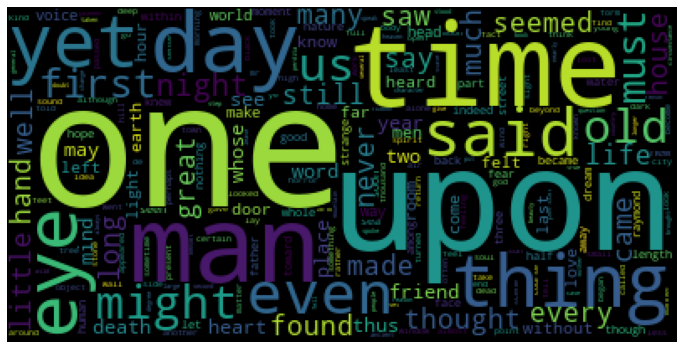

In [ ]:
longText = ','.join(list(df['text_processed'].values))
# generate the word cloud
wordcloud = WordCloud(background_color="black",
                      max_words= 600,
                      contour_width = 10,
                      contour_color = "steelblue",
                     collocations=False).generate(longText)
# visualize the word cloud
fig = plt.figure(1, figsize = (12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
nltk.download("punkt")
# word_tokenize 
df["tokenized"] = df["text_processed"].apply(lambda x: nltk.word_tokenize(x))
df["tokenized"] = df["tokenized"].apply(lambda words: [word for word in words if word.isalnum()])
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,author,Raw Length,text_processed,full_name,tokenized
0,"This process, however, afforded me no means of...",EAP,41,process however afforded means ascertaining di...,Edgar Alan Poe,"[process, however, afforded, means, ascertaini..."
1,It never once occurred to me that the fumbling...,HPL,14,never occurred fumbling might mere mistake,HP Lovecraft,"[never, occurred, fumbling, might, mere, mistake]"
2,"In his left hand was a gold snuff box, from wh...",EAP,36,left hand gold snuff box capered hill cutting ...,Edgar Alan Poe,"[left, hand, gold, snuff, box, capered, hill, ..."
3,How lovely is spring As we looked from Windsor...,MWS,34,lovely spring looked windsor terrace sixteen f...,Mary SHelley,"[lovely, spring, looked, windsor, terrace, six..."
4,"Finding nothing else, not even gold, the Super...",HPL,27,finding nothing else even gold superintendent ...,HP Lovecraft,"[finding, nothing, else, even, gold, superinte..."
...,...,...,...,...,...,...
19574,"I could have fancied, while I looked at it, th...",EAP,20,could fancied looked eminent landscape painter...,Edgar Alan Poe,"[could, fancied, looked, eminent, landscape, p..."
19575,The lids clenched themselves together as if in...,EAP,10,lids clenched together spasm,Edgar Alan Poe,"[lids, clenched, together, spasm]"
19576,"Mais il faut agir that is to say, a Frenchman ...",EAP,13,mais il faut agir say frenchman never faints o...,Edgar Alan Poe,"[mais, il, faut, agir, say, frenchman, never, ..."
19577,"For an item of news like this, it strikes us i...",EAP,15,item news like strikes us coolly received,Edgar Alan Poe,"[item, news, like, strikes, us, coolly, received]"


In [ ]:
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
def word_lemmatizer(text):
  lem_text = [WordNetLemmatizer().lemmatize(i,pos='v') for i in text]
  return lem_text
df["lemmatized"] = df["tokenized"].apply(lambda x: word_lemmatizer(x))
lemmatized_data=df["lemmatize_joined"] =df["lemmatized"].apply(lambda x: ' '.join(x))
pd.set_option('display.max_colwidth', 100)
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,author,Raw Length,text_processed,full_name,tokenized,lemmatized,lemmatize_joined
0,"This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I m...",EAP,41,process however afforded means ascertaining dimensions dungeon might make circuit return point w...,Edgar Alan Poe,"[process, however, afforded, means, ascertaining, dimensions, dungeon, might, make, circuit, ret...","[process, however, afford, mean, ascertain, dimension, dungeon, might, make, circuit, return, po...",process however afford mean ascertain dimension dungeon might make circuit return point whence s...
1,It never once occurred to me that the fumbling might be a mere mistake.,HPL,14,never occurred fumbling might mere mistake,HP Lovecraft,"[never, occurred, fumbling, might, mere, mistake]","[never, occur, fumble, might, mere, mistake]",never occur fumble might mere mistake
2,"In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all mann...",EAP,36,left hand gold snuff box capered hill cutting manner fantastic steps took snuff incessantly air ...,Edgar Alan Poe,"[left, hand, gold, snuff, box, capered, hill, cutting, manner, fantastic, steps, took, snuff, in...","[leave, hand, gold, snuff, box, caper, hill, cut, manner, fantastic, step, take, snuff, incessan...",leave hand gold snuff box caper hill cut manner fantastic step take snuff incessantly air greate...
3,How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread be...,MWS,34,lovely spring looked windsor terrace sixteen fertile counties spread beneath speckled happy cott...,Mary SHelley,"[lovely, spring, looked, windsor, terrace, sixteen, fertile, counties, spread, beneath, speckled...","[lovely, spring, look, windsor, terrace, sixteen, fertile, counties, spread, beneath, speckle, h...",lovely spring look windsor terrace sixteen fertile counties spread beneath speckle happy cottage...
4,"Finding nothing else, not even gold, the Superintendent abandoned his attempts; but a perplexed ...",HPL,27,finding nothing else even gold superintendent abandoned attempts perplexed look occasionally ste...,HP Lovecraft,"[finding, nothing, else, even, gold, superintendent, abandoned, attempts, perplexed, look, occas...","[find, nothing, else, even, gold, superintendent, abandon, attempt, perplex, look, occasionally,...",find nothing else even gold superintendent abandon attempt perplex look occasionally steal count...


In [ ]:
# The min and the max appear to be outliers; let's view what these sentences are

df.iloc[df['Raw Length'].idxmin()]

text                 "PIQUANT EXPRESSIONS.
author                                 EAP
Raw Length                               2
text_processed         piquant expressions
full_name                   Edgar Alan Poe
tokenized           [piquant, expressions]
lemmatized          [piquant, expressions]
lemmatize_joined       piquant expressions
Name: 6936, dtype: object

In [ ]:
df.iloc[df['Raw Length'].idxmax()]

text                Diotima approached the fountain seated herself on a mossy mound near it and her disciples placed...
author                                                                                                              MWS
Raw Length                                                                                                          861
text_processed      diotima approached fountain seated mossy mound near disciples placed grass near without noticing...
full_name                                                                                                  Mary SHelley
tokenized           [diotima, approached, fountain, seated, mossy, mound, near, disciples, placed, grass, near, with...
lemmatized          [diotima, approach, fountain, seat, mossy, mound, near, disciples, place, grass, near, without, ...
lemmatize_joined    diotima approach fountain seat mossy mound near disciples place grass near without notice sit cl...
Name: 9215, dtype: object

In [ ]:
from matplotlib import cm

In [ ]:
all_words = df["lemmatize_joined"].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 Word frequencies in the training dataset'
)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")
py.iplot(fig, filename='basic-bar')


In [ ]:
freq_words = Counter(" ".join(df["lemmatize_joined"]).split()).most_common(26)
print(freq_words)

[('one', 1623), ('upon', 1411), ('could', 1316), ('would', 1241), ('say', 1224), ('make', 960), ('come', 887), ('time', 872), ('know', 866), ('find', 843), ('even', 827), ('man', 780), ('see', 737), ('eye', 732), ('yet', 715), ('think', 697), ('take', 690), ('seem', 673), ('might', 629), ('go', 626), ('like', 621), ('old', 616), ('us', 613), ('first', 602), ('must', 594), ('look', 588)]


In [ ]:
uniques=len(set(df['text']))
print("number of unique words:",uniques)

number of unique words: 19579


### 3-Modeling

In [ ]:
df.columns

Index(['text', 'author', 'Raw Length', 'text_processed', 'full_name',
       'tokenized', 'lemmatized', 'lemmatize_joined'],
      dtype='object')

In [ ]:
df.shape

(19579, 8)

In [ ]:
df['author'].shape

(19579,)

In [ ]:
df.loc[:,['text', 'Raw Length', 'text_processed', 'full_name','tokenized', 'lemmatized', 'lemmatize_joined']].shape

(19579, 7)

In [ ]:
from sklearn.preprocessing import LabelEncoder
y=df.loc[:,['author']]
en=LabelEncoder()
y=en.fit_transform(y.author.values)

In [ ]:
X = df.text
# X1=df.text_processed
X2=df.lemmatize_joined
#y = df.author

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#X_train1, X_test1, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)
X_train2, X_test2, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)



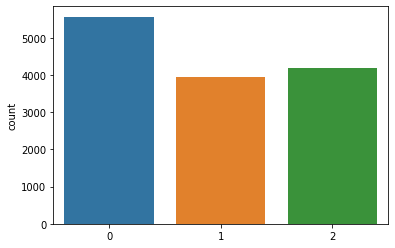

In [ ]:
sns.countplot(y_train);

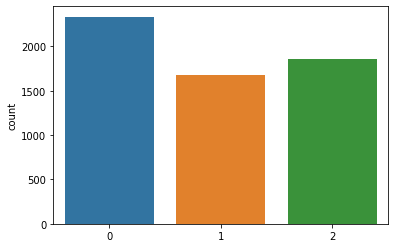

In [ ]:
sns.countplot(y_test);

In [ ]:
from sklearn.metrics import log_loss

In [ ]:
# The first document-term matrix has default Count Vectorizer values - counts of unigrams
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english')

#text
X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()

,aaem,aback,abandon,abandoned,abandoning,abandonment,abaout,abased,abasement,abashed,abashment,abate,abatement,abbey,abbreviation,abbé,abdicated,abdication,abdul,abernethy,aberrant,aberration,aberrations,abeyance,abhor,abhorred,abhorrence,abhorrent,abide,abigail,abijah,abilities,ability,abject,abjure,ablaze,able,ably,abnormal,abnormalities,...,zeal,zealous,zeb,zebub,zebulon,zechariah,zee,zenith,zenobia,zephyr,zest,zide,zigzag,zigzagging,zimmer,zimmerman,zircon,zit,zobna,zobnarian,zodiac,zodiacal,zoilus,zokkar,zone,zones,zopyrus,zorry,zuro,ångstrom,ædile,ægyptus,æmilianus,æneid,æronaut,æronauts,ærostation,æschylus,élite,υπνος
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv2= CountVectorizer(stop_words='english')

#text lemmwtized
X_train_cv2 = cv2.fit_transform(X_train2)
X_test_cv2  = cv2.transform(X_test2)

pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names()).head()

,aaem,aback,abandon,abandonment,abaout,abase,abasement,abash,abashment,abate,abatement,abb,abbey,abbreviation,abdicate,abdication,abdul,abernethy,aberrant,aberration,aberrations,abeyance,abhor,abhorrence,abhorrent,abide,abigail,abijah,abilities,ability,abject,abjure,ablaze,able,ably,abnormal,abnormalities,abnormality,abnormally,aboard,...,youths,yuletide,yxu,yxur,zadok,zaffre,zaiat,zaimi,zaire,zann,zar,zath,zay,zeal,zealous,zeb,zebub,zebulon,zechariah,zee,zenith,zenobia,zephyr,zest,zide,zigzag,zimmer,zimmerman,zircon,zit,zobna,zobnarian,zodiac,zodiacal,zoilus,zokkar,zone,zopyrus,zorry,zuro
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)

y_pred_cv1_nb = mnb.predict(X_test_cv1)

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      2335
           1       0.83      0.80      0.82      1677
           2       0.79      0.85      0.82      1862

    accuracy                           0.82      5874
   macro avg       0.82      0.82      0.82      5874
weighted avg       0.82      0.82      0.82      5874
 

Log Loss: 0.5
Confusion Matrix for Naive Bayes (text ,CountVectorize) 



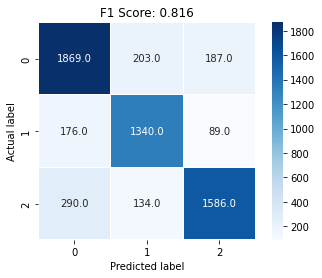

In [ ]:
from sklearn.metrics import confusion_matrix
pred1 = mnb.predict_proba(X_test_cv1)

print('Classification Report')
print('='*60)
print(classification_report(y_test,y_pred_cv1_nb),"\n")
print('Log Loss:', round(metrics.log_loss(y_test, pred1),2))

print('='*60)


print("Confusion Matrix for Naive Bayes (text ,CountVectorize)","\n")
score = round(accuracy_score(y_pred_cv1_nb, y_test),3)
f1_score = round(f1_score(y_pred_cv1_nb, y_test, pos_label='positive',
                                           average='micro'),3) 
cm1 = confusion_matrix(y_pred_cv1_nb, y_test)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('F1 Score: {0}'.format(f1_score), size = 12)
plt.show()
print("\n")

In [ ]:
mnb2 = MultinomialNB()
mnb2.fit(X_train_cv2, y_train)

y_pred_cv2_nb = mnb2.predict(X_test_cv2)

In [ ]:
y_pred_cv2_nb

array([0, 2, 2, ..., 2, 1, 1])

In [ ]:
y_test

array([0, 2, 2, ..., 2, 1, 1])

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2335
           1       0.83      0.79      0.81      1677
           2       0.78      0.85      0.81      1862

    accuracy                           0.81      5874
   macro avg       0.81      0.81      0.81      5874
weighted avg       0.81      0.81      0.81      5874
 

Log Loss: 0.5
Confusion Matrix for Naive Bayes (Lemmetized text ,CountVectorize) 



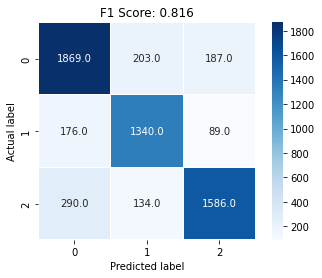

In [ ]:
from sklearn import metrics, model_selection
pred2 = mnb2.predict_proba(X_test_cv2)

print('Classification Report')
print('='*60)
print(classification_report(y_test,y_pred_cv2_nb),"\n")
print('Log Loss:', round(metrics.log_loss(y_test, pred2),2))
print('='*60)


print("Confusion Matrix for Naive Bayes (Lemmetized text ,CountVectorize)","\n")
score = round(accuracy_score(y_pred_cv2_nb, y_test),3)
# f1_score =(f1_score(y_pred_cv2_nb, y_test, pos_label='negative',
#                                            average='micro'))  
cm2 = confusion_matrix(y_pred_cv2_nb, y_test)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('F1 Score: {0}'.format(f1_score), size = 12)
plt.show()
print("\n")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf1 = tfidf.fit_transform(X_train)
X_test_tfidf1 = tfidf.transform(X_test)

In [ ]:
print(f'''Shape of Train set:{X_train_tfidf1.shape}
Shape of Test set: {X_test_tfidf1.shape}''')

Shape of Train set:(13705, 21920)
Shape of Test set: (5874, 21920)


In [ ]:
pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf.get_feature_names()).head()

,aaem,aback,abandon,abandoned,abandoning,abandonment,abaout,abased,abasement,abashed,abashment,abate,abatement,abbey,abbreviation,abbé,abdicated,abdication,abdul,abernethy,aberrant,aberration,aberrations,abeyance,abhor,abhorred,abhorrence,abhorrent,abide,abigail,abijah,abilities,ability,abject,abjure,ablaze,able,ably,abnormal,abnormalities,...,zeal,zealous,zeb,zebub,zebulon,zechariah,zee,zenith,zenobia,zephyr,zest,zide,zigzag,zigzagging,zimmer,zimmerman,zircon,zit,zobna,zobnarian,zodiac,zodiacal,zoilus,zokkar,zone,zones,zopyrus,zorry,zuro,ångstrom,ædile,ægyptus,æmilianus,æneid,æronaut,æronauts,ærostation,æschylus,élite,υπνος
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mnbTFIDF = MultinomialNB()
mnbTFIDF.fit(X_train_tfidf1.toarray(), y_train)
y_pred_tfidf1_nb = mnbTFIDF.predict(X_test_tfidf1)
cm7 = confusion_matrix(y_test, y_pred_tfidf1_nb)

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.93      0.81      2335
           1       0.94      0.65      0.77      1677
           2       0.87      0.78      0.82      1862

    accuracy                           0.80      5874
   macro avg       0.84      0.79      0.80      5874
weighted avg       0.83      0.80      0.80      5874
 

Log Loss: 0.62
Confusion Matrix for Naive Bayes (text,TFIDF) 



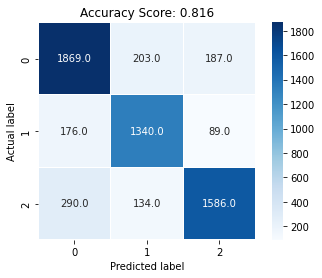

In [ ]:
pred3= mnbTFIDF.predict_proba(X_test_tfidf1)

print('Classification Report')
print('='*60)
print(classification_report(y_test,y_pred_tfidf1_nb),"\n")
print('Log Loss:', round(metrics.log_loss(y_test, pred3),2))

print('='*60)


print("Confusion Matrix for Naive Bayes (text,TFIDF)","\n")
score = round(accuracy_score(y_pred_tfidf1_nb, y_test),3) 
# f1_score = round(f1_score(y_pred_tfidf1_nb, y_test),3) 
cm2 = confusion_matrix(y_pred_tfidf1_nb, y_test)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
         square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(f1_score), size = 12)
plt.show()
print("\n")

In [ ]:
tfidf = TfidfVectorizer()
X_train_tfidf2 = tfidf.fit_transform(X_train2)
X_test_tfidf2 = tfidf.transform(X_test2)

In [ ]:
mnbTFIDF2 = MultinomialNB()
mnbTFIDF2.fit(X_train_tfidf2.toarray(), y_train)
y_pred_tfidf2_nb = mnbTFIDF2.predict(X_test_tfidf2)
cm7 = confusion_matrix(y_test, y_pred_tfidf2_nb)

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.89      0.81      2335
           1       0.89      0.70      0.79      1677
           2       0.83      0.80      0.81      1862

    accuracy                           0.81      5874
   macro avg       0.82      0.79      0.80      5874
weighted avg       0.81      0.81      0.80      5874
 

Log Loss: 0.6
Confusion Matrix for Naive Bayes (text lemmitized,TFIDF) 



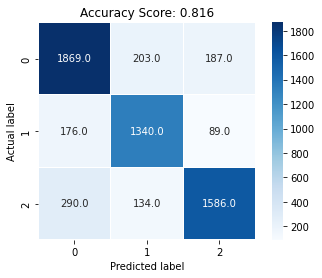

In [ ]:
pred4= mnbTFIDF2.predict_proba(X_test_tfidf2)

print('Classification Report')
print('='*60)
print(classification_report(y_test,y_pred_tfidf2_nb),"\n")
print('Log Loss:', round(metrics.log_loss(y_test, pred4),2))
print('='*60)


print("Confusion Matrix for Naive Bayes (text lemmitized,TFIDF)","\n")
score = round(accuracy_score(y_pred_tfidf2_nb, y_test),3) 
# f1_score = round(f1_score(y_pred_tfidf2_nb, y_test),3) 
cm3 = confusion_matrix(y_pred_tfidf2_nb, y_test)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
         square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(f1_score), size = 12)
plt.show()
print("\n")

#### SVM

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
# with count victorizer (text)
SVM1 = svm.SVC(probability=True)
SVM1.fit(X_train_cv1,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svm_pred_cv1 = SVM1.predict(X_test_cv1)

Classification Report
              precision    recall  f1-score   support

           0       0.68      0.85      0.76      2335
           1       0.76      0.67      0.71      1677
           2       0.83      0.66      0.73      1862

    accuracy                           0.74      5874
   macro avg       0.76      0.73      0.73      5874
weighted avg       0.75      0.74      0.74      5874
 

Log Loss: 0.63
Confusion Matrix for SVM (text ,CountVectorize) 



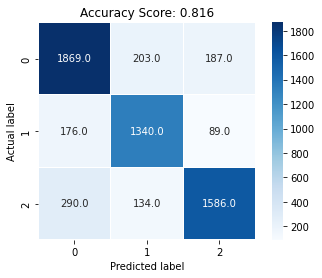

In [ ]:

pred5= SVM1.predict_proba(X_test_cv1)

print('Classification Report')
print('='*60)
print(classification_report(y_test,svm_pred_cv1),"\n")
print('Log Loss:', round(metrics.log_loss(y_test, pred5),2))
print('='*60)


print("Confusion Matrix for SVM (text ,CountVectorize)","\n")
score = round(accuracy_score(svm_pred_cv1, y_test),3) 
# f1_score = round(f1_score(svm_pred_cv1, y_test),3) 
cm3 = confusion_matrix(svm_pred_cv1, y_test)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
         square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(f1_score), size = 12)
plt.show()
print("\n")

In [ ]:
# with count victorizer (lemmetized)
SVM2 = svm.SVC(probability=True)
SVM2.fit(X_train_cv2,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svm_pred_cv2 = SVM2.predict(X_test_cv2)

Classification Report
              precision    recall  f1-score   support

           0       0.68      0.85      0.76      2335
           1       0.77      0.69      0.73      1677
           2       0.84      0.65      0.73      1862

    accuracy                           0.74      5874
   macro avg       0.76      0.73      0.74      5874
weighted avg       0.75      0.74      0.74      5874
 

Log Loss: 0.63
Confusion Matrix for SVM (lemmetized ,CountVectorize) 



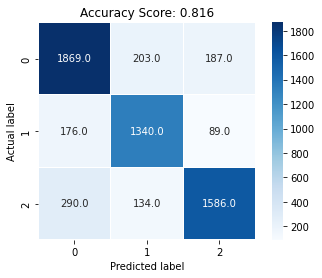

In [ ]:

pred6= SVM2.predict_proba(X_test_cv2)

print('Classification Report')
print('='*60)
print(classification_report(y_test,svm_pred_cv2),"\n")
print('Log Loss:', round(metrics.log_loss(y_test, pred6),2))
print('='*60)


print("Confusion Matrix for SVM (lemmetized ,CountVectorize)","\n")
score = round(accuracy_score(svm_pred_cv2, y_test),3)
# f1_score = round(f1_score(svm_pred_cv1, y_test),3)  
cm3 = confusion_matrix(svm_pred_cv2, y_test)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
         square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(f1_score), size = 12)
plt.show()
print("\n")

In [ ]:
# with TF-IDF (text)
SVM3 = svm.SVC(probability=True)
SVM3.fit(X_train_tfidf1,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svm_pred_tfidf1 = SVM3.predict(X_test_tfidf1)

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      2335
           1       0.83      0.77      0.80      1677
           2       0.85      0.76      0.80      1862

    accuracy                           0.81      5874
   macro avg       0.82      0.80      0.81      5874
weighted avg       0.81      0.81      0.81      5874
 

Log Loss: 0.48
Confusion Matrix for SVM (text ,TF-IDF) 



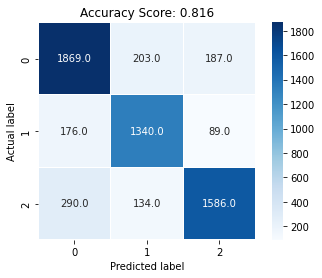

In [ ]:

pred7= SVM3.predict_proba(X_test_tfidf1)

print('Classification Report')
print('='*60)
print(classification_report(y_test,svm_pred_tfidf1),"\n")
print('Log Loss:', round(metrics.log_loss(y_test, pred7),2))
print('='*60)


print("Confusion Matrix for SVM (text ,TF-IDF)","\n")
score = round(accuracy_score(svm_pred_tfidf1, y_test),3)
# f1_score = round(f1_score(svm_pred_tfidf1, y_test),3)  
cm3 = confusion_matrix(svm_pred_tfidf1, y_test)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
         square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(f1_score), size = 12)
plt.show()
print("\n")

In [ ]:
# with TF-IDF (lemmetized)
SVM4 = svm.SVC(probability=True)
SVM4.fit(X_train_tfidf2,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svm_pred_tfidf2 = SVM4.predict(X_test_tfidf2)

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      2335
           1       0.83      0.75      0.79      1677
           2       0.85      0.74      0.79      1862

    accuracy                           0.79      5874
   macro avg       0.81      0.79      0.79      5874
weighted avg       0.80      0.79      0.79      5874
 

Log Loss: 0.51
Confusion Matrix for SVM (lemmetized text ,TF-IDF) 



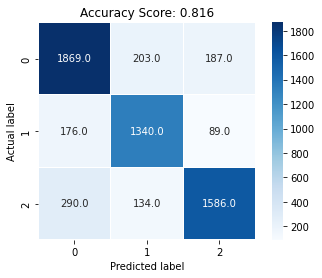

In [ ]:
pred8= SVM4.predict_proba(X_test_tfidf2)

print('Classification Report')
print('='*60)
print(classification_report(y_test,svm_pred_tfidf2),"\n")
print('Log Loss:', round(metrics.log_loss(y_test, pred8),2))
print('='*60)


print("Confusion Matrix for SVM (lemmetized text ,TF-IDF)","\n")
score = round(accuracy_score(svm_pred_tfidf2, y_test),3)
# f1_score = round(f1_score(svm_pred_tfidf2, y_test),3)  
cm3 = confusion_matrix(svm_pred_tfidf2, y_test)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
         square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(f1_score), size = 12)
plt.show()
print("\n")

***NOTE***

SVM took long time running so we need to reduce number of features from TF-IDF using SVD, Also we need to sndardizee the data

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA

In [ ]:
from sklearn import preprocessing

#choosing 120 components for svd, Assuming 120 to 200 components are good to go for

svd = TruncatedSVD(n_components= 120)

#lemmetized text(tfidf)
svd.fit(X_test_tfidf2)
xtrain_svd = svd.transform(X_train_tfidf2)
xtest_svd = svd.transform(X_test_tfidf2)

scl = preprocessing.StandardScaler()
scl.fit(xtrain_svd)
xtrain_svd_scl = scl.transform(xtrain_svd)
xtest_svd_scl = scl.transform(xtest_svd)

In [ ]:

svd1 = TruncatedSVD(n_components= 120)

#lemmetized text(count vectorizer)
svd1.fit(X_test_cv2)
xtrain_svd1 = svd1.transform(X_train_cv2)
xtest_svd1 = svd1.transform(X_test_cv2)

scl1 = preprocessing.StandardScaler()
scl1.fit(xtrain_svd)
xtrain_svd_scl1 = scl1.transform(xtrain_svd1)
xtest_svd_scl1 = scl1.transform(xtest_svd1)

In [ ]:
clf1 = SVC(C=1.0, #Penalty parameter C of the error term.
          probability= True) # since we need probability
clf1.fit(xtrain_svd_scl1, y_train)
p=clf1.predict(xtest_svd_scl1)
predictions = clf1.predict_proba(xtest_svd_scl1)

In [ ]:
#fitting SVM
clf = SVC(C=1.0, #Penalty parameter C of the error term.
          probability= True) # since we need probability
clf.fit(xtrain_svd_scl, y_train)
p=clf.predict(xtest_svd_scl)
predictions = clf.predict_proba(xtest_svd_scl)

Classification Report
              precision    recall  f1-score   support

           0       0.61      0.76      0.67      2335
           1       0.66      0.55      0.60      1677
           2       0.68      0.57      0.62      1862

    accuracy                           0.64      5874
   macro avg       0.65      0.62      0.63      5874
weighted avg       0.64      0.64      0.63      5874
 

Log Loss: 0.84
Confusion Matrix for SVM (lemmetized text with count vectorizer, after scaling and using SVD) 



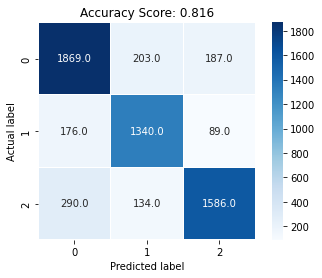

In [ ]:
print('Classification Report')
print('='*60)
print(classification_report(y_test,p),"\n")
print('Log Loss:', round(metrics.log_loss(y_test, predictions),2))
print('='*60)


print("Confusion Matrix for SVM (lemmetized text with count vectorizer, after scaling and using SVD)","\n")
score = round(accuracy_score(p, y_test),3) 
# f1_score = round(f1_score(p, y_test),3)  
cm3 = confusion_matrix(p, y_test)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
         square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(f1_score), size = 12)
plt.show()
print("\n")

Classification Report
              precision    recall  f1-score   support

           0       0.63      0.83      0.71      2335
           1       0.75      0.53      0.62      1677
           2       0.75      0.64      0.69      1862

    accuracy                           0.68      5874
   macro avg       0.71      0.67      0.67      5874
weighted avg       0.70      0.68      0.68      5874
 

Log Loss: 0.74
Confusion Matrix for SVM (lemmetized text with TF-IDF, after scaling and using SVD) 



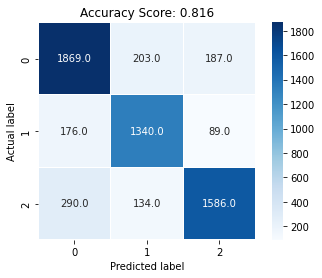

In [ ]:
print('Classification Report')
print('='*60)
print(classification_report(y_test,p),"\n")
print('Log Loss:', round(metrics.log_loss(y_test, predictions),2))
print('='*60)


print("Confusion Matrix for SVM (lemmetized text with TF-IDF, after scaling and using SVD)","\n")
score = round(accuracy_score(p, y_test),3) 
# f1_score = round(f1_score(p, y_test),3)  
cm3 = confusion_matrix(p, y_test)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
         square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(f1_score), size = 12)
plt.show()
print("\n")

### 4-LDA

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)   

In [ ]:
eap = df[df.author=="EAP"]["lemmatize_joined"].values
hpl = df[df.author=="HPL"]["lemmatize_joined"].values
mws = df[df.author=="MWS"]["lemmatize_joined"].values

In [ ]:
lemm = WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

In [ ]:
# from nltk.stem import WordNetLemmatizer 
# nltk.download('wordnet')
# def word_lemmatizer(text):
#   lem_text = [WordNetLemmatizer().lemmatize(i,pos='v') for i in text]
#   return lem_text
# df["lemmatized"] = df["tokenized"].apply(lambda x: word_lemmatizer(x))
# lemmatized_data=df["lemmatize_joined"] =df["lemmatized"].apply(lambda x: ' '.join(x))

In [ ]:
text = list(df.lemmatize_joined.values)
# Calling our overwritten Count vectorizer
tf_vectorizer = LemmaCountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(text)

In [ ]:
text1 = list(eap)
# Calling our overwritten Count vectorizer
tf_vectorizer1 = LemmaCountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf1 = tf_vectorizer1.fit_transform(text1)

In [ ]:
text2 = list(hpl)
# Calling our overwritten Count vectorizer
tf_vectorizer2 = LemmaCountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf2 = tf_vectorizer2.fit_transform(text2)

In [ ]:
text3 = list(mws)
# Calling our overwritten Count vectorizer
tf_vectorizer3 = LemmaCountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf3 = tf_vectorizer3.fit_transform(text3)

In [ ]:

feature_names = tf_vectorizer.get_feature_names()
count_vec = np.asarray(tf.sum(axis=0)).ravel()
zipped = list(zip(feature_names, count_vec))
x, y = (list(x) for x in zip(*sorted(zipped, key=lambda x: x[1], reverse=True)))
# Now I want to extract out on the top 15 and bottom 15 words
Y = np.concatenate([y[0:15], y[-16:-1]])
X = np.concatenate([x[0:15], x[-16:-1]])

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[0:50],
            y = y[0:50],
            marker= dict(colorscale='Jet',
                         color = y[0:50]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")
py.iplot(fig, filename='basic-bar')

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[-100:],
            y = y[-100:],
            marker= dict(colorscale='Portland',
                         color = y[-100:]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Bottom 100 Word frequencies after Preprocessing'
)

fig1 = go.Figure(data=data, layout=layout)
fig1.show(renderer="colab")
py.iplot(fig1, filename='basic-bar')

In [ ]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [ ]:
data_dense = tf.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  0.0946162283442348 %


In [ ]:
lda = LatentDirichletAllocation(n_components=11, max_iter=10,
                                learning_method = 'online',
                                learning_offset = 50.,
                                  random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,)

In [ ]:
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=11, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:like wall tree fact reason mr fear turn water secret resolve point appear impossible mean make afford valley simple particular material labour marble reflect happen forbid le convince accomplish whateley story mystery altogether collect need print usual supply awful big

Topic #1:form foot watch look window dark black sure little cast ruin follow dog wear escape event field height visible fashion apparent clothe journey outside daughter glass throw half native slight queer tower depth contain ancient effort commence witness weight address

Topic #2:hear night voice eye felt man human time lay moment hand away think leave sound draw make heart reach horror dead hour sit saw tear remain wonder turn place break character come look word old fell head water pas despair

Topic #3:earth saw good soon appear mean grow moon sun stand light star arise behold longer line city sea white sky god cloud sleep space mark heaven crowd lie tomb wind high mountain descend

In [ ]:
topic_labels = ['Topic {}'.format(i) for i in range(1, 3+1)]

In [ ]:
lda_base = LatentDirichletAllocation(n_components=3, max_iter=10,
                                learning_method = 'online',
                                learning_offset = 50.,
                                  random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,)

In [ ]:
lda_base.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=3, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda_base, tf_feature_names, n_top_words)
#topic 0 nature light earth tree wind
#topic 1 drama friend love feel dream
#topic 2 gohst spirit death fear kill terror


Topics in LDA model: 

Topic #0:light like open earth door let come night eye sound room saw hour wind hold mr rise lay sense tree wall fall look far moon draw thing sun air sight stand appear mountain form fancy city shadow star arise away

Topic #1:say house great old make leave thing little long head street way look foot face place like object know window hand body man close day right length eye come stone meet small people ancient land water large discover suppose think

Topic #2:time say know life man day think make hear love word come speak feel heart death tell friend shall mind voice year return father night die dream good long raymond eye fear moment soon thing live horror spirit young old


In [ ]:
lda1 = LatentDirichletAllocation(n_components=1, max_iter=10,
                                learning_method = 'online',
                                learning_offset = 50.,
                                  random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,)

In [ ]:
lda1.fit(tf1)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=1, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
n_top_words = 40
print("\nTopics in LDA model for EAP: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda1, tf_feature_names, n_top_words)
#topic 0 is about children disaease
#topic 1 nature buterfly location europe dolphin 


Topics in LDA model for EAP: 

Topic #0:infantile expense louder europe enormity lock crane expiration cassiopeia device evoke blasphemy location equalize facilitate firm exaction mynheer grovel dimension erich joke disarrangement establishment fabric assiduity greatly friendship croak morbidly david foot err desperate cognoscenti fathom frequent debauchery gnarl alfred


In [ ]:
lda2 = LatentDirichletAllocation(n_components=1, max_iter=10,
                                learning_method = 'online',
                                learning_offset = 50.,
                                  random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,)

In [ ]:
lda2.fit(tf2)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=1, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
n_top_words = 40
print("\nTopics in LDA model for HPL: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda2, tf_feature_names, n_top_words)
#topic 0 is about epoch eighty civility honesty


Topics in LDA model for HPL: 

Topic #0:joint bestow fawn dunwich italy kanadaw eighty energy hip exult device endear hindrance jointly delusion embellishment epoch chimerical bush day franticly inquisitive eh embarrass confidence extra edge inordinate appeal measure civility deviation confirm cheese heave mare medical fond constantly beast


In [ ]:
lda3 = LatentDirichletAllocation(n_components=1, max_iter=10,
                                learning_method = 'online',
                                learning_offset = 50.,
                                  random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,)

In [ ]:
lda3.fit(tf3)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=1, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
n_top_words = 40
print("\nTopics in LDA model for MWS: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda3, tf_feature_names, n_top_words)


Topics in LDA model for MWS: 

Topic #0:diffusion devastate civilisation blemish clot corner disagree fix habitu axiom experiment disarrange cliff block depository comprehend guardedly diet despotism contributor cloak imperfectly forefinger feather distasteful drowsily eminent devise corn bristle elicit gainsay asunder attitude fitting hunt impregnable didst engrave dreadfully


In [ ]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda.score(tf))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(tf))

# See model parameters
pprint(lda.get_params())

Log Likelihood:  -1875443.7201326322
Perplexity:  6349.32850690651
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 50.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 11,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [ ]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_base.score(tf))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_base.perplexity(tf))

# See model parameters
pprint(lda_base.get_params())

Log Likelihood:  -1806289.9943111641
Perplexity:  4597.3632817906855
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 50.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 3,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [ ]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda1.score(tf1))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda1.perplexity(tf1))

# See model parameters
pprint(lda1.get_params())

Log Likelihood:  -626997.8863739638
Perplexity:  3378.5688779072416
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 50.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 1,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [ ]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda2.score(tf2))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda2.perplexity(tf2))

# See model parameters
pprint(lda2.get_params())

Log Likelihood:  -535712.5934230223
Perplexity:  3245.048026497253
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 50.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 1,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [ ]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda3.score(tf3))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda3.perplexity(tf3))

# See model parameters
pprint(lda3.get_params())

Log Likelihood:  -513823.9758068409
Perplexity:  2517.774504399173
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 50.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 1,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [ ]:
topics_count = lda_base.components_
print(topics_count.shape)
topics_count[:3]

(3, 11280)


array([[ 2.34045219,  1.01251224,  0.37125547, ...,  2.44611295,
         2.94050644,  0.39245271],
       [ 0.35634865, 22.26194425,  0.35331021, ...,  0.35840648,
         0.35425855,  2.6918516 ],
       [ 0.348093  , 18.53591078,  4.99130282, ...,  0.35881831,
         0.34493363,  0.34016679]])

In [ ]:
topics_prob = topics_count / topics_count.sum(axis=1).reshape(-1, 1)
topics = pd.DataFrame(topics_prob.T,
                      index=tf_feature_names,
                      columns=topic_labels)
topics.head()

,Topic 1,Topic 2,Topic 3
aback,0.000037,0.000005,0.000004
abandon,0.000016,0.000332,0.000195
abandonment,0.000006,0.000005,0.000052
abaout,0.000006,0.000374,0.000004
abate,0.000007,0.000063,0.000004


In [ ]:
top_words = {}
for topic, words_ in topics.items():
    top_words[topic] = words_.nlargest(20).index.tolist()
pd.DataFrame(top_words)

,Topic 1,Topic 2,Topic 3
0,light,say,time
1,like,house,say
2,open,great,know
3,earth,old,life
4,door,make,man
5,let,leave,day
6,come,thing,think
7,night,little,make
8,eye,long,hear
9,sound,head,love


In [ ]:
train_preds = lda_base.transform(tf)
train_preds.shape

(19579, 3)

In [ ]:
train_eval = pd.DataFrame(train_preds, columns=topic_labels, index=df.author)
train_eval.sample(n=10)

,Topic 1,Topic 2,Topic 3
author,,,
MWS,0.590913,0.083355,0.325732
EAP,0.693725,0.033558,0.272717
HPL,0.433505,0.315716,0.250779
HPL,0.338656,0.577646,0.083698
MWS,0.024201,0.384528,0.591271
MWS,0.194224,0.034116,0.771660
MWS,0.212033,0.269165,0.518803
EAP,0.112929,0.380081,0.506990
MWS,0.056212,0.057827,0.885961


Text(0.5, 1.0, 'Train Data: Topic Assignments')

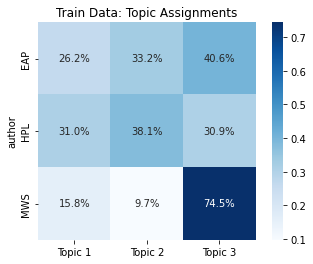

In [ ]:
df = train_eval.groupby(level='author').idxmax(
    axis=1).reset_index(-1, drop=True)
sns.heatmap(df.groupby(level='author').value_counts(normalize=True)
            .unstack(-1), annot=True, fmt='.1%', cmap='Blues', square=True)
plt.title('Train Data: Topic Assignments')

In [ ]:
# from sklearn.model_selection import GridSearchCV
# # Define Search Param
# search_params = {'n_components': [1,2,3, 5, 7, 9], 'learning_decay': [.5, .7, .9]}

# # Init the Model
# lda = LatentDirichletAllocation()

# # Init Grid Search Class
# model = GridSearchCV(lda_base, param_grid=search_params)

# # Do the Grid Search
# model.fit(tf)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# # Define Search Param
# search_params = {'n_components': [1,2,3, 5, 7, 9], 'learning_decay': [.5, .7, .9]}

# # Init the Model
# lda = LatentDirichletAllocation()

# # Init Grid Search Class
# model = GridSearchCV(lda, param_grid=search_params)

# # Do the Grid Search
# model.fit(tf1)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# # Define Search Param
# search_params = {'n_components': [1,2,3, 5, 7, 9], 'learning_decay': [.5, .7, .9]}

# # Init the Model
# lda = LatentDirichletAllocation()

# # Init Grid Search Class
# model = GridSearchCV(lda, param_grid=search_params)

# # Do the Grid Search
# model.fit(tf2)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# # Define Search Param
# search_params = {'n_components': [1,2,3, 5, 7, 9], 'learning_decay': [.5, .7, .9]}

# # Init the Model
# lda = LatentDirichletAllocation()

# # Init Grid Search Class
# model = GridSearchCV(lda, param_grid=search_params)

# # Do the Grid Search
# model.fit(tf3)

In [ ]:
# # Best Model
# best_lda_model = model.best_estimator_

# # Model Parameters
# print("Best Model's Params: ", model.best_params_)

# # Log Likelihood Score
# print("Best Log Likelihood Score: ", model.best_score_)

# # Perplexity
# print("Model Perplexity: ", best_lda_model.perplexity(tf))

In [ ]:
# vectorizer = CountVectorizer(analyzer='word',       
#                              min_df=10,                        # minimum reqd occurences of a word 
#                              stop_words='english',             # remove stop words
#                              lowercase=True,                   # convert all words to lowercase
#                              token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
#                              # max_features=50000,             # max number of uniq words
#                             )

# data_vectorized = vectorizer.fit_transform(lemmatized_data)

In [ ]:
# lda_output = best_lda_model.transform(tf)
# lda_output

In [ ]:
# np.round(lda_output, 2)

In [ ]:
# pyLDAvis.enable_notebook()
# panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
# panel

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [ ]:
lemm = WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

In [ ]:
first_topic = lda_base.components_[0]
second_topic = lda_base.components_[1]
third_topic = lda_base.components_[2]


In [ ]:
first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]
third_topic_words = [tf_feature_names[i] for i in third_topic.argsort()[:-50 - 1 :-1]]


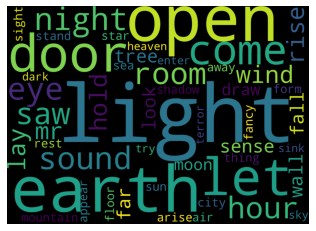

In [ ]:
firstcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

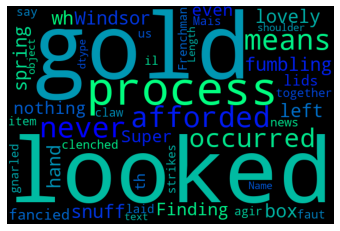

In [ ]:
secondcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(second_topic_words))
plt.imshow(cloud)
plt.axis('off')
plt.show()

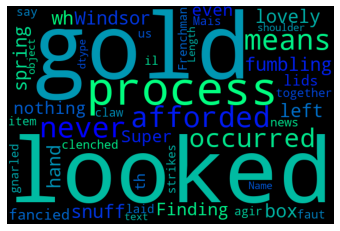

In [ ]:
thirdcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(third_topic_words))
plt.imshow(cloud)
plt.axis('off')
plt.show()